In [207]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import unidecode
from sklearn.feature_extraction.text import CountVectorizer

In [280]:
from unidecode import unidecode

In [156]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dalyaadams/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
import string

In [237]:
reviews = pd.read_csv('brazilian-ecommerce/Dataset/olist_order_reviews_dataset.csv')

# Data Look

In [214]:
list(reviews.columns)

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

In [215]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [216]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [217]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Convert Text objects to stringd for analysis 

In [220]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [221]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0 NaN\n1 ...,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0 NaN\n1 ...,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0 NaN\n1 ...,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0 NaN\n1 ...,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0 NaN\n1 ...,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [238]:
#if 4 or 5, positive; if 3, neutral; if 1 or 3, negative

conditions = [
    (reviews['review_score']==5),
    (reviews['review_score']==4), 
    (reviews['review_score']==3),
    (reviews['review_score']==2), 
    (reviews['review_score']==1)
]
choices = ['positive', 'positive', 'neutral', 'negative', 'negative']

reviews['review_sentiment'] =  np.select(conditions, choices, default = 'NULL')

In [239]:
#if 4 or 5, positive; if 3, neutral; if 1 or 3, negative

conditions = [
    (reviews['review_score']==5),
    (reviews['review_score']==4), 
    (reviews['review_score']==3),
    (reviews['review_score']==2), 
    (reviews['review_score']==1)
]
choices = [5, 5, 3, 1, 1]

reviews['review_sentiment_code'] =  np.select(conditions, choices, default = 'NULL')

In [291]:
#create dataframe where noth title and message aren't null
#keep all columns
edit_review = reviews

In [292]:
#Create a column that is title and review together
edit_review['full_text'] = edit_review['review_comment_title'].str.cat(edit_review[['review_comment_message']], sep='. ', na_rep='Delete')

In [293]:
edit_review['full_text'].head()

0                                       Delete. Delete
1                                       Delete. Delete
2                                       Delete. Delete
3        Delete. Recebi bem antes do prazo estipulado.
4    Delete. Parabéns lojas lannister adorei compra...
Name: full_text, dtype: object

In [294]:
edit_review= edit_review[edit_review.full_text!= "Delete. Delete"]

In [296]:
del edit_review['full_text']

In [299]:
#Create a column that is title and review together
edit_review['full_text'] = edit_review['review_comment_title'].str.cat(edit_review[['review_comment_message']], sep='. ', na_rep=' ')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [300]:
edit_review['text length'] = edit_review['full_text'].apply(len)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [302]:
#need a balanced dataset to train on. 

edit_review = edit_review[(edit_review['review_sentiment'] == 'positive') | (edit_review['review_sentiment'] == 'negative')]
edit_review.shape


(39730, 11)

In [303]:
# remove all punctuation 
edit_review["full_text"] = edit_review["full_text"].str.replace('[^\w\s]','')
edit_review["full_text"] = edit_review["full_text"].str.replace('\r','')
edit_review["full_text"] = edit_review["full_text"].str.replace('\n','')


In [304]:
#remove upper case
edit_review["full_text"]=edit_review["full_text"].str.lower()

In [325]:
edit_review["full_text"].head()

3                  recebi bem antes do prazo estipulado
4       parabens lojas lannister adorei comprar pela...
9     recomendo aparelho eficiente no site a marca d...
12               mas um pouco travandopelo valor ta boa
15    super recomendo vendedor confiavel produto ok ...
Name: full_text, dtype: object

In [306]:
#replace accent letters with unaccented letters

edit_review["full_text"] = edit_review["full_text"].apply(unidecode)

In [307]:
edit_review["full_text"].head()

3                  recebi bem antes do prazo estipulado
4       parabens lojas lannister adorei comprar pela...
9     recomendo aparelho eficiente no site a marca d...
12               mas um pouco travandopelo valor ta boa
15    super recomendo vendedor confiavel produto ok ...
Name: full_text, dtype: object

## EDA 

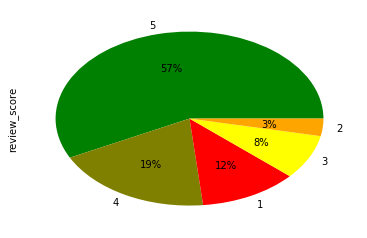

In [11]:
reviews.review_score.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "olive", "red","yellow", "orange"])

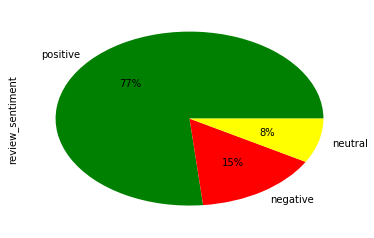

In [20]:
reviews.review_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red","yellow"])

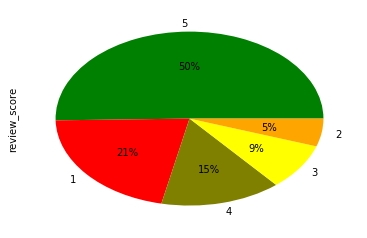

In [66]:
edit_review.review_score.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green",  "red","olive", "yellow", "orange"])

In [249]:
#how many reviews are 5 stars? How many are 1 stars? 

edit_review['review_score'].value_counts()

5    21882
1     9263
4     6336
3     3752
2     2249
Name: review_score, dtype: int64

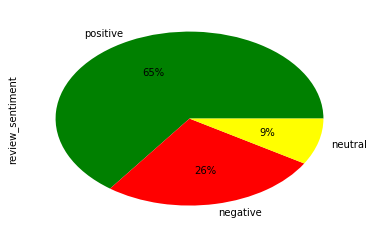

In [65]:
edit_review.review_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red","yellow"])

In [250]:
edit_review['review_sentiment'].value_counts()

positive    28218
negative    11512
neutral      3752
Name: review_sentiment, dtype: int64

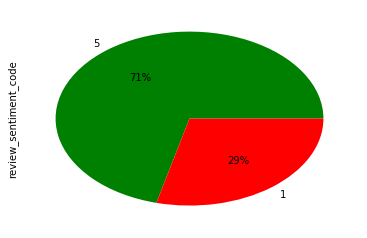

In [308]:
edit_review.review_sentiment_code.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red","yellow"])

In [309]:
edit_review['review_sentiment_code'].value_counts()

5    28218
1    11512
Name: review_sentiment_code, dtype: int64

## Now that the data has been cleaned, lets try and do sentiment analysis  

In [319]:
X = edit_review['full_text']
y = edit_review['review_sentiment_code']

In [324]:
X.head()

3                  recebi bem antes do prazo estipulado
4       parabens lojas lannister adorei comprar pela...
9     recomendo aparelho eficiente no site a marca d...
12               mas um pouco travandopelo valor ta boa
15    super recomendo vendedor confiavel produto ok ...
Name: full_text, dtype: object

In [321]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]

In [322]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [323]:
len(bow_transformer.vocabulary_)

19677

In [330]:
X = bow_transformer.transform(X)

In [333]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (39730, 19677)
Amount of Non-Zero occurrences:  286587
Density: 0.03665886677441997


In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [335]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [336]:
preds = nb.predict(X_test)

In [348]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))

[[3088  395]
 [ 568 7868]]


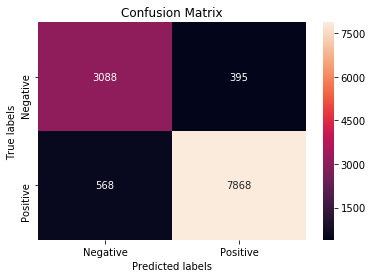

In [365]:
cm=confusion_matrix(y_test, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels([ 'Negative','Positive']);


In [347]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.84      0.89      0.87      3483
          5       0.95      0.93      0.94      8436

avg / total       0.92      0.92      0.92     11919



In [339]:
preds

array(['1', '5', '5', ..., '1', '5', '5'], dtype='<U1')

In [ ]:
#training set needs to be even split of positive and negative reviews



# Word Cloud

In [343]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [350]:
stopwords = set(stopwords.words('portuguese'))

In [352]:

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        stopwords=stopwords,
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

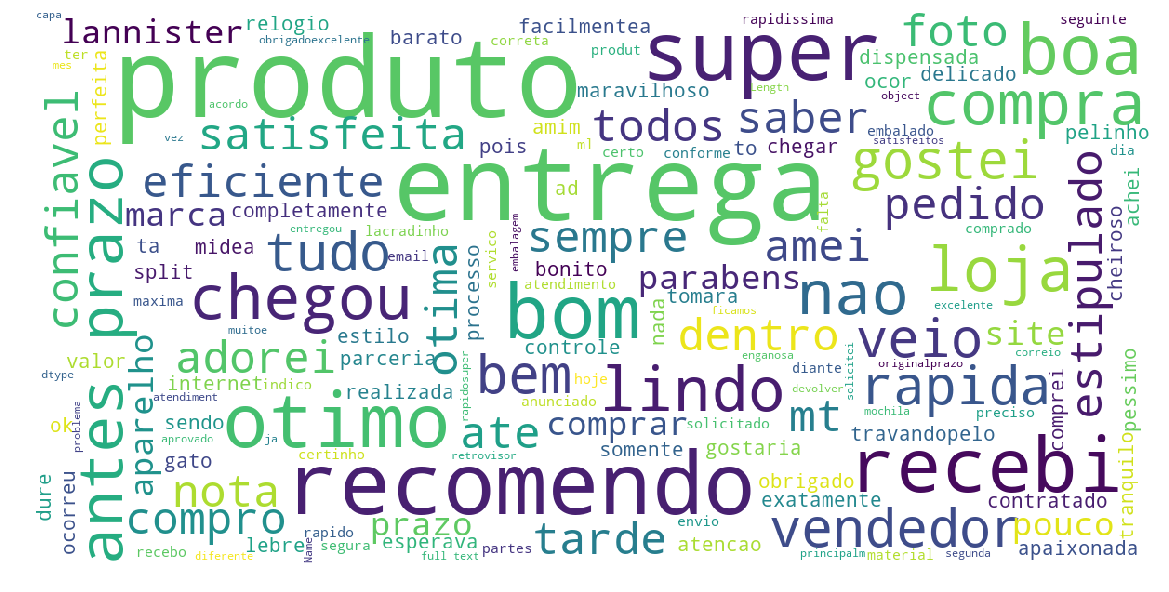

In [353]:
# print wordcloud
show_wordcloud(edit_review['full_text'])

In [357]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        stopwords=stopwords,
    ).generate(str(edit_review['full_text']))

In [360]:
wordcloud.words_

{'produto': 1.0,
 'entrega': 0.8571428571428571,
 'recomendo': 0.5714285714285714,
 'super': 0.5,
 'recebi': 0.42857142857142855,
 'otimo': 0.42857142857142855,
 'bom': 0.42857142857142855,
 'boa': 0.35714285714285715,
 'nao': 0.2857142857142857,
 'chegou': 0.2857142857142857,
 'loja': 0.2857142857142857,
 'compra': 0.2857142857142857,
 'lindo': 0.2857142857142857,
 'antes prazo': 0.2857142857142857,
 'bem': 0.21428571428571427,
 'vendedor': 0.21428571428571427,
 'gostei': 0.21428571428571427,
 'tudo': 0.21428571428571427,
 'veio': 0.21428571428571427,
 'rapida': 0.21428571428571427,
 'estipulado': 0.14285714285714285,
 'adorei': 0.14285714285714285,
 'eficiente': 0.14285714285714285,
 'confiavel': 0.14285714285714285,
 'saber': 0.14285714285714285,
 'sempre': 0.14285714285714285,
 'nota': 0.14285714285714285,
 'compro': 0.14285714285714285,
 'pedido': 0.14285714285714285,
 'ate': 0.14285714285714285,
 'mt': 0.14285714285714285,
 'amei': 0.14285714285714285,
 'otima': 0.142857142857142

In [42]:
#https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9 

In [182]:
#output csv 

#edit_review.to_csv('edit_review.csv')